# Quantum Teleportation
## What is it?
Using qubits and the transfer of classical information, we can transfer the one quantum state to another by the use of EPR pairs (quantum entangled qubits).

## How is it done?
By using EPR pairs, we can give one qubit of the pair to the receiver and the other to the sender. We first partially entangle the unknown quantum state that the sender has, using a CNOT gate, and then we apply a Hadamard gate. By using some algebra, we can see that if the send observes that current entangled qubit pair, we can know what transformation the receiver should apply on their end, to obtain the unknown quantum state. 

This operation is in accordance with the law of conservation of quantum information. This is because, once the sender observes the quantum state, the superposition collapses, and the information is destroyed. However, the receiver has the unknown quantum state after applying the required quantum gates.

By this way, we can send quantum information across very large distances. We may need to do this because we can't store the amplitudes of a qubit (as it would require infinite memory). 

This approach however, isn't at the speed of light. This is because, we still need to convey classical information about the observed state of the sender to the receiver. Since classical information can't travel faster than the speed of light, the upper limit on the speed of this operation, is the speed of light itself.

## Notebook

Here we will require three qubits. Two will be a part of an EPR pair (|Φ+⟩) and the other one will be the unknown state that we want to send. One of the EPR pair qubits will be physically taken by the receiver, while the other two are with the sender.

In [ ]:
#!pip install 'qiskit[visualization]'

In [ ]:
from qiskit.visualization.state_visualization import plot_bloch_multivector,plot_state_qsphere
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector,plot_state_city
from qiskit.quantum_info import Statevector,random_statevector
from qiskit.tools.visualization import circuit_drawer

In [ ]:
#Initialise circuit
simulator = QasmSimulator()
circuit = QuantumCircuit(3, 2) #We will be needing three qubits and two classical bits to transfer the information to the sender

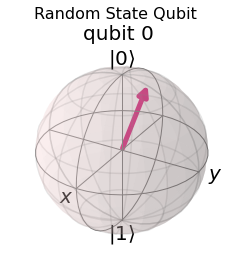

In [ ]:
#Initialise the values of the first two qubits to zero

circuit.initialize([1,0],0)
circuit.initialize([1,0],1)

#Initialise the value of the third qubit to a random state

random_amplitude = random_statevector(2)
circuit.initialize(random_amplitude.data,2)

#Plot the unknown state that is to be copied
random_amplitude.draw(output='bloch',title='Random State Qubit')
#print("The random amplitude is: ",random_amplitude.data)

We assume that the first qubit is the one taken by the receiver. The second qubit is the other EPR qubit that is kept by the sender. This third qubit is the unknown state that is to be transmitted.

In [ ]:
#Generate the EPR pair between the first two qubits
#This can be done by using a Hadamard gate, succeeded by a controlled-X gate

circuit.h(1)
circuit.cx(1,0)

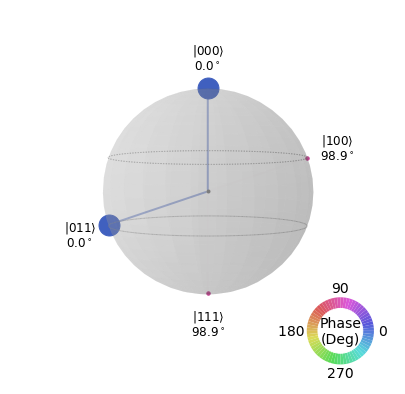

In [ ]:
#This is a visualisation of the three states initially

state = Statevector(circuit)
plot_state_qsphere(state,show_state_phases = True, use_degrees = True)

Assuming that the receiver has gone away now, we have to now partially entangle the last two qubits, that is, the sender's qubits (unknown qubit and one qubit of the EPR pair). Then, we apply a Hadamard gate on the unknown state qubit.

In [ ]:
#Partial entanglement
circuit.cx(2,1)

#Apply Hadamard gate on unknown state qubit
circuit.h(2)

After applying the required gates on the qubits, on the sender's end, we can observe the qubits. Based on what output we obtain, we will convey that information to the receiver classically. Based on that, the receiver will apply suitable gates to transform their qubit of the EPR pair into the unknown quantum state.

On the sender's end, we can observe the two qubits and tell the receiver to act accordingly.

In [ ]:
#circuit.measure([1,2],[0,1])

If the state obtained is (sender's EPR qubit,unknown quantum state):
*  00: Don't apply any gate
*  01: Apply Z gate
*  10: Apply X gate
*  11: Apply X and Z gates

Since based on the value of a particular qubit, we are applying the respective gates, we can utilise controlled-X and controlled-Z gates for the same.

In [ ]:
#Applying controlled X gate on the receiver's qubit
circuit.cx(1,0,label="Controlled-X Gate")

#Applying controlled Z gate on the receiver's qubit
circuit.cz(2,0,label="Controlled-Z Gate")

By this point of time, upon observation, the superposition would have collapsed on the sender's end and the receiver would have obtained the required unknown quantum state that had to be transfered.

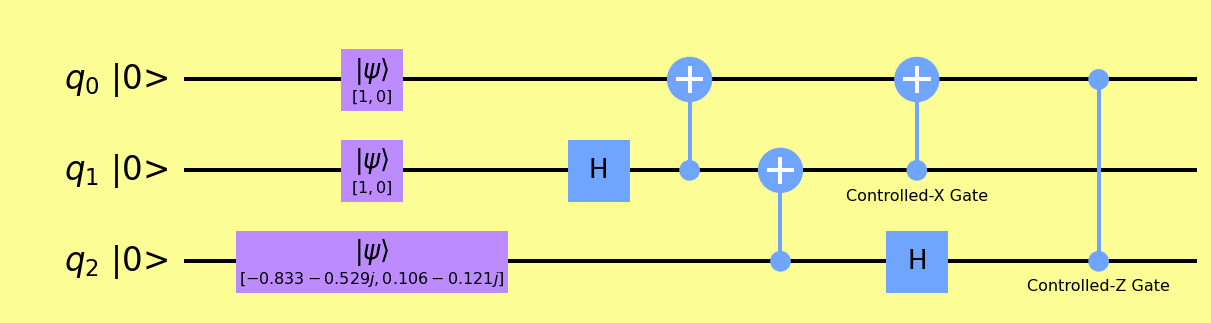

In [ ]:
# Draw the circuit
circuit_drawer(circuit,
               output='mpl',
               style={'backgroundcolor': '#fdfd96'},
               scale=2,
               #justify='none',
               idle_wires=False,
               initial_state=True,
               cregbundle=False
               )


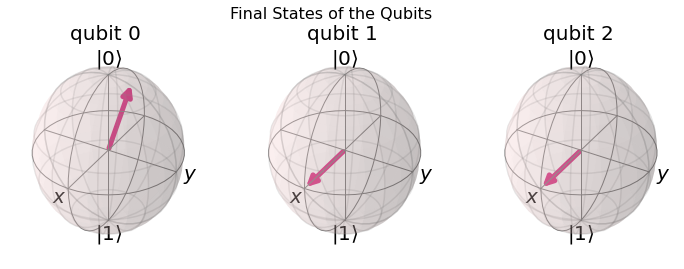

In [ ]:
state = Statevector(circuit)
plot_bloch_multivector(state,title='Final States of the Qubits')

In [ ]:
#Here we measure the values of the sender's bits
circuit.measure([1,2],[0,1])

We can perform this teleportation experiment multiple times, and see what classical bits the sender got and transferred to the receiver classically. A histogram of 1000 iterations of sending the same unknown qubit is shown, it tells what operation the receiver had to perform to transform his qubit into the unknown state.

In [ ]:
#Upon multiple iterations, we look at which gates (Controlled-X and Controlled-Z) were applied how many times
#Compile the results
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

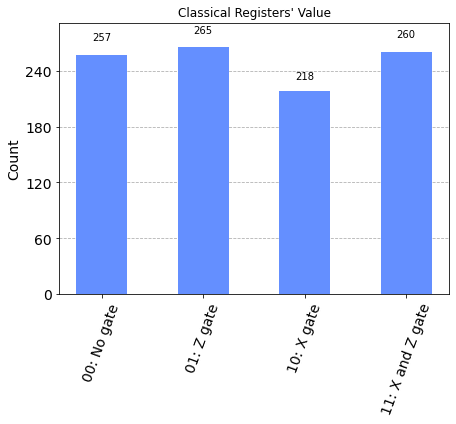

In [ ]:
counts = result.get_counts(compiled_circuit)
temp_dict = {'00':'00: No gate','01':'01: Z gate','10':'10: X gate','11':'11: X and Z gate'}
plot_histogram(dict((temp_dict[key],value) for (key,value) in counts.items()),title='Classical Registers\' Value')

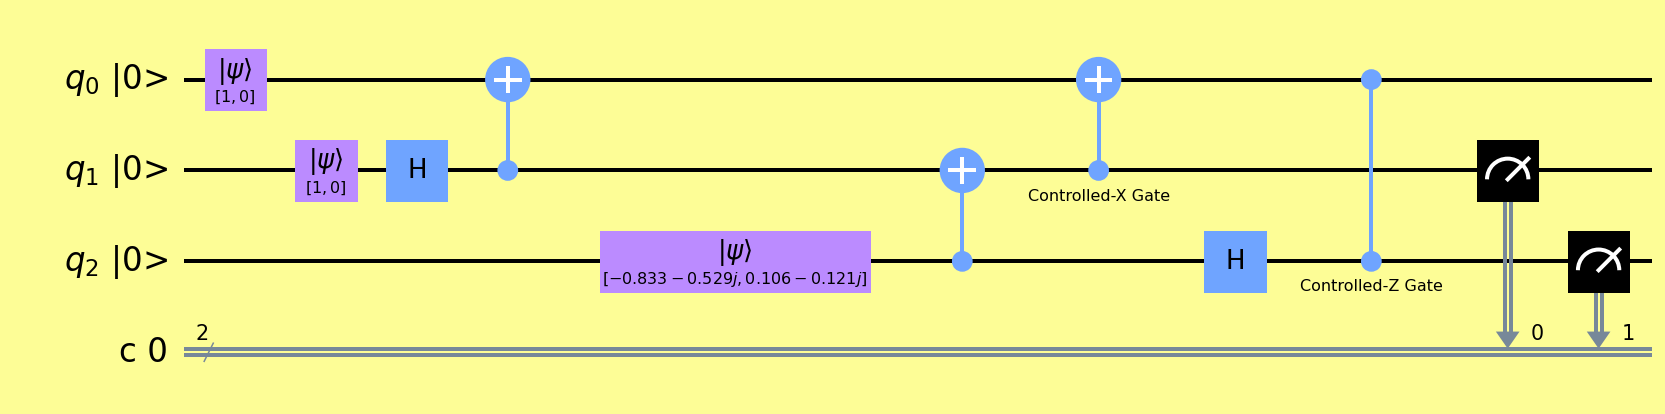

In [ ]:
# Draw the circuit
circuit_drawer(circuit,
               output='mpl',
               style={'backgroundcolor': '#fdfd96'},
               scale=2,
               justify='none',
               idle_wires=False,
               initial_state=True,
               cregbundle=True
               )